# Linear Regression 

Before learning what Linear regression is, let's understand what regression is.

### Regression

Regression analysis is a type of predictive modelling tehnique which finds the relationship between a dependent variable and an independent variable. It involves graphing a line over a set of data points that mostly fits the data. A regression shows the changes in the dependent variable on the Y-axis and independent variable(explanatory variable) on the X-axis.

Regression is maily used in following applications,

- Finding the strength of predictors 

- Analysis of Trends 

- Forecasting  
 

Where can linear regression be used ?

- Analyzing the effect of price changes 

- Assesment of risk in finance domain 

- Evaluating trends and sales estimates 
 

Now let's see how linear regression works,

Suppose we have the dependent variable on Y-axis and the independent variable on the X-axis.

- If both independent and depenedent variables are increasing, the line we'll get will be a positive regression line.

- If both independent is increasing but depenedent variables is decresing, the line we'll get will be a negative regression line.

This regression line that we'll get is nothing but our linear regression line. It will have the equation,   \begin{align}
y & = mx + c \\ \end{align}

Which is nothing but the equation of a line.


Now, let's say we plot few points on the graph, and we want to find out the best fit line. In order to do that we'll have to find out a regression line which will have minimum distance from every point on the graph, which is nothing but minimizing the error in estimated values and the predicted values.

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Reading data from csv
df = pd.read_csv('headbrain.csv', index_col=False)
print(df.shape)
df.head(5)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Now let's collect X and Y values for regression
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [4]:
# Now let's find mean values for X and Y and total number of values
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)

# Let's find the values of m(slope) and c(intercept)
numerator = denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
m = numerator / denominator
c = y_mean - (m * x_mean)

print(f'Slope: {m}\nIntercept: {c}')

Slope: 0.26342933948939945
Intercept: 325.57342104944223


##### This implies our equation is,
\begin{align}
y & = 0.26342933948939945x + 325.57342104944223 \\ \end{align}
 which is nothing but our linear regression model.

Now let's see it visually,

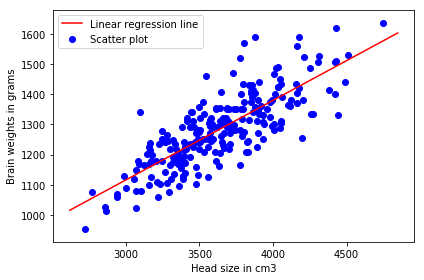

In [5]:
# Values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Get the line values for plotting
x = np.linspace(min_x, max_x, 1000)
y = m*x + c

# Plot our line
plt.plot(x, y, color='r', label='Linear regression line')
plt.scatter(X, Y, c='b', label='Scatter plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weights in grams')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

Now let's see how good is our model,

In [7]:
total_square_sum = total_res_square_sum = 0
for i in range(n):
    pred = c + X[i] * m 
    total_square_sum += (Y[i] - y_mean) ** 2
    total_res_square_sum += (Y[i] - pred) ** 2
    
r_square = total_res_square_sum / total_square_sum

print(f'R2: {r_square}')

R2: 0.3606882800429997
